# PyCaret のインストール

In [1]:
!pip install pycaret[full]==3.0.4  # 書籍執筆時点のバージョンをインストール


# 最新版をインストール場合はこちら
# !pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━

# 回帰における評価指標

## PyCaretで使用できる評価指標一覧

In [2]:
import pycaret
pycaret.__version__

'3.0.4'

In [3]:
from pycaret.regression import *
from pycaret.datasets import get_data


data = get_data('insurance')
reg = setup(data, target='charges', session_id=1234)

get_metrics()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,Description,Value
0,Session id,1234
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x7b1c1b984790>,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x7b1c1b984940>,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x7b1c1b984940>,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x7b1c1b984c10>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


## RMSE/MSEの実践

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np


y_true = np.array([5, 7, 20, 12])
y_pred = np.array([3, 10, 14, 12])

# MSE
mse = mean_squared_error(y_true, y_pred)
print('MSE: ', mse)

# RMSE
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

MSE:  12.25
RMSE:  3.5


## MAE の実践

In [5]:
from sklearn.metrics import mean_absolute_error
import numpy as np


y_true = np.array([5, 7, 20, 12])
y_pred = np.array([3, 10, 14, 12])

# MAE
mae = mean_absolute_error(y_true, y_pred)
print('MAE: ', mae)

MAE:  2.75


## RMSLEの実践

In [6]:
from sklearn.metrics import mean_squared_log_error
import numpy as np


y_true = np.array([5, 7, 20, 12])
y_pred = np.array([3, 10, 14, 12])

# RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
print('RMSLE: ', rmsle)

RMSLE:  0.3078263710167483


## MAPE

In [7]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np


y_true = np.array([5, 7, 20, 12])
y_pred = np.array([3, 10, 14, 12])

# MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: ', mape)

MAPE:  0.28214285714285714


## R^2

In [8]:
from sklearn.metrics import r2_score
import numpy as np


y_true = np.array([5, 7, 20, 12])
y_pred = np.array([3, 10, 14, 12])

# R^2
r2 = r2_score(y_true, y_pred)
print('R^2: ', r2)

R^2:  0.6343283582089552


# 分類における評価指標

In [9]:
from pycaret.classification import *
from pycaret.datasets import get_data


data = get_data('diabetes')
cls = setup(data, target='Class variable', session_id=1234)

get_metrics()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,1234
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7b1c1b937d90>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7b1c1b937eb0>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7b1c1b950040>,make_scorer(matthews_corrcoef),pred,{},True,True,False


## 混同行列

In [10]:
from sklearn.metrics import confusion_matrix


y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('TP: ', tp)
print('FP: ', fp)
print('FN: ', fn)
print('TN: ', tn)

TP:  4
FP:  1
FN:  2
TN:  3


## ACC

In [11]:
from sklearn.metrics import accuracy_score


y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

print('ACC: ', accuracy_score(y_true, y_pred))

ACC:  0.7


## Recall

In [12]:
from sklearn.metrics import recall_score


y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

print('Recall: ', recall_score(y_true, y_pred))

Recall:  0.6666666666666666


## Precision

In [13]:
from sklearn.metrics import precision_score


y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

print('Precision: ', precision_score(y_true, y_pred))

Precision:  0.8


## F1

In [14]:
from sklearn.metrics import f1_score


y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

print('F1: ', f1_score(y_true, y_pred))

F1:  0.7272727272727272


## Kappa

In [15]:
from sklearn.metrics import cohen_kappa_score


y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

print('Kappa: ', cohen_kappa_score(y_true, y_pred))

Kappa:  0.4


## Mcc

In [16]:
from sklearn.metrics import matthews_corrcoef


y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

print('MCC: ', matthews_corrcoef(y_true, y_pred))

MCC:  0.408248290463863


# metrics を追加

In [17]:
from pycaret.classification import *
from pycaret.datasets import get_data
from sklearn.metrics import log_loss


diabetes = get_data('diabetes')
setup(diabetes, target = 'Class variable', session_id = 123)

add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

get_metrics()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7b1c1b937d90>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7b1c1b937eb0>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7b1c1b950040>,make_scorer(matthews_corrcoef),pred,{},True,True,False
logloss,Log Loss,Log Loss,<function log_loss at 0x7b1c1b950820>,"make_scorer(log_loss, greater_is_better=False)",pred,{},False,True,True


In [18]:
from pycaret.classification import *
from pycaret.datasets import get_data
from sklearn.metrics import log_loss


diabetes = get_data('diabetes')
setup(diabetes, target = 'Class variable', session_id = 123)

add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

compare_models()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,8.3308,1.3120
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,8.3976,0.2060
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,8.3976,0.0760
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,9.0663,1.6830
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,9.2729,0.2360
catboost,CatBoost Classifier,0.7410,0.7993,0.5278,0.6630,0.5851,0.4005,0.4078,9.3371,2.5990
gbc,Gradient Boosting Classifier,0.7373,0.7917,0.5550,0.6445,0.5931,0.4013,0.4059,9.4693,0.3230
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,9.4731,0.2760
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,9.7363,0.6770
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,9.7980,0.1400


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 評価の可視化


In [19]:
import pycaret
pycaret.__version__

'3.0.4'

# plot_model

## 回帰

### モデル作成

In [20]:
from pycaret.datasets import get_data
from pycaret.regression import *


data = get_data('insurance')
s = setup(data, target='charges', session_id=1234)

best = compare_models()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,Description,Value
0,Session id,1234
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2486.5451,20885144.4816,4516.3078,0.8469,0.4269,0.2924,0.6050
lightgbm,Light Gradient Boosting Machine,2850.0747,23570828.1289,4812.4953,0.8282,0.5439,0.3620,0.4810
catboost,CatBoost Regressor,2705.7897,23566395.9658,4817.2171,0.8277,0.4763,0.3321,1.6780
rf,Random Forest Regressor,2663.1874,23457666.6190,4800.8086,0.8269,0.4656,0.3361,0.5910
et,Extra Trees Regressor,2709.4529,27055222.9606,5149.1977,0.8000,0.4792,0.3251,0.7510
ada,AdaBoost Regressor,4172.1812,27902093.0161,5233.9743,0.7944,0.6247,0.7188,0.4770
xgboost,Extreme Gradient Boosting,3068.1430,28190156.2000,5279.6925,0.7941,0.5647,0.3933,0.2680
ridge,Ridge Regression,4152.6664,37464049.5956,6069.5381,0.7353,0.5782,0.4192,0.3910
lar,Least Angle Regression,4135.9826,37459956.2167,6069.3597,0.7352,0.5680,0.4160,0.2190
br,Bayesian Ridge,4144.1828,37461729.2298,6069.4374,0.7352,0.5708,0.4176,0.1730


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [21]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [22]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5002.2089,58832727.2740,7670.2495,0.7548,0.4542,0.3200
1,4020.2016,33874259.9324,5820.1598,0.7263,0.5171,0.3696
2,4059.1179,37969379.4259,6161.9298,0.7514,0.4967,0.3925
3,4103.8113,32285652.6018,5682.0465,0.7761,0.6382,0.4356
4,5021.6208,48694801.4984,6978.1661,0.6767,0.5986,0.4801
5,4171.3730,33794940.7097,5813.3416,0.7953,0.6225,0.4547
6,4232.5624,45056984.8218,6712.4500,0.5399,0.5916,0.4318
7,3753.0078,31527769.1556,5614.9594,0.7972,0.7180,0.3489
8,3214.6860,23658410.2539,4863.9912,0.8074,0.5167,0.4555


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### 残差プロット

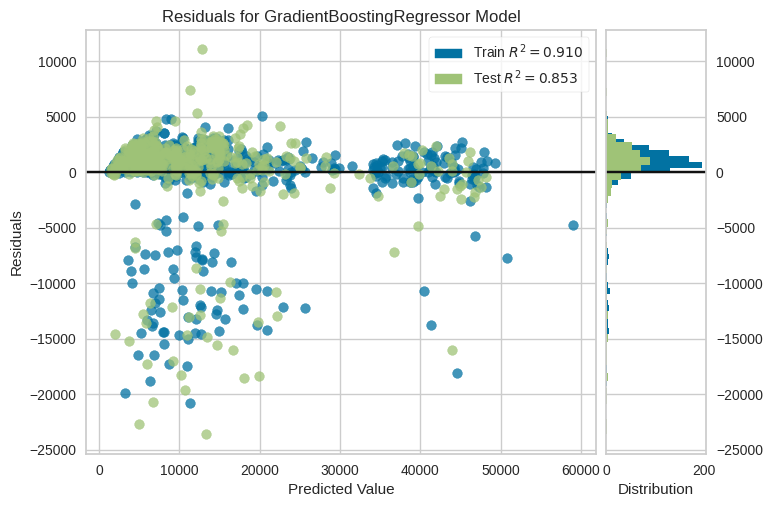

In [23]:
plot_model(best, plot='residuals')

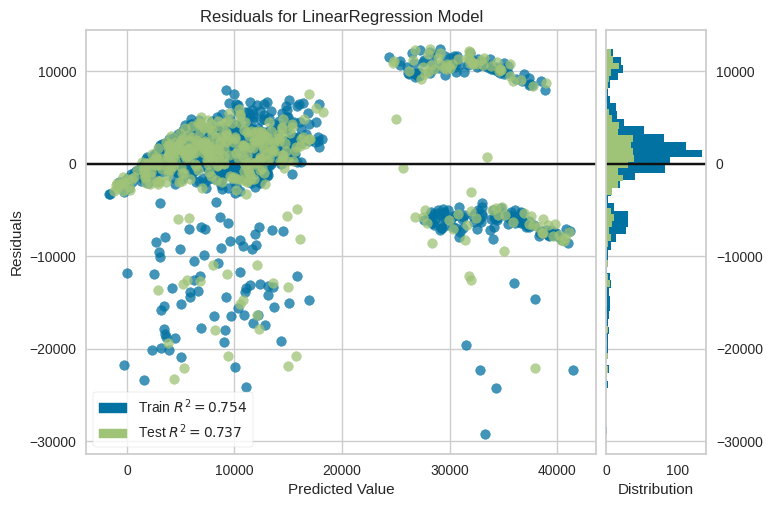

In [24]:
plot_model(lr, plot='residuals')

### 予測誤差プロット

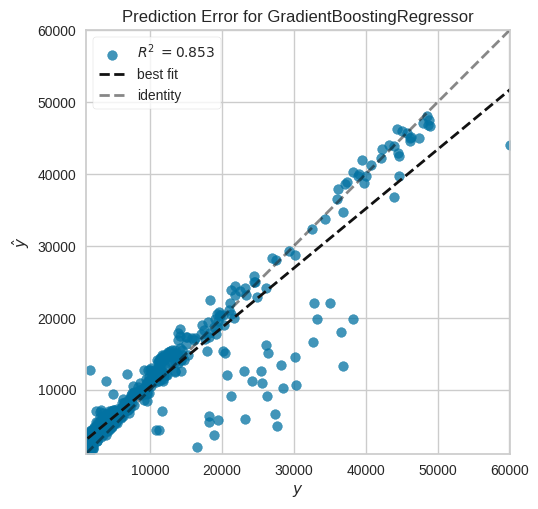

In [25]:
plot_model(best, plot='error')

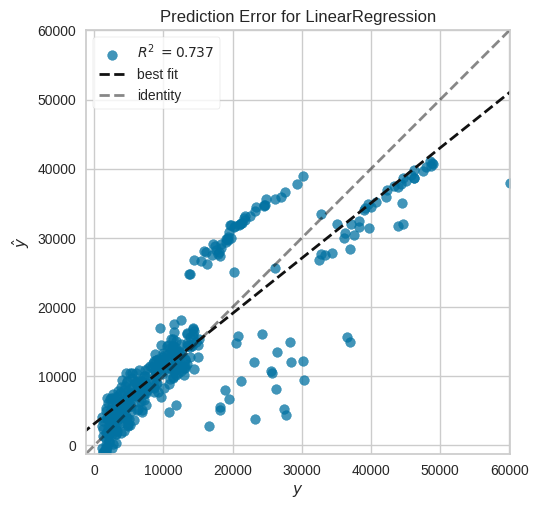

In [26]:
plot_model(lr, plot='error')

### Cook's distance

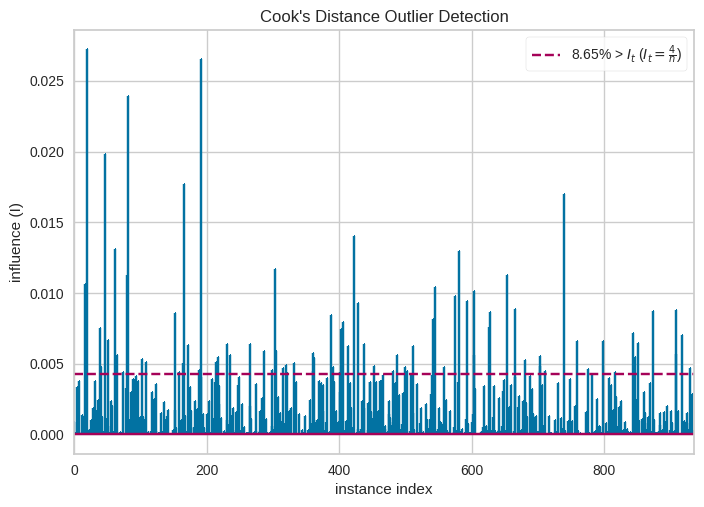

In [27]:
plot_model(best, plot='cooks')

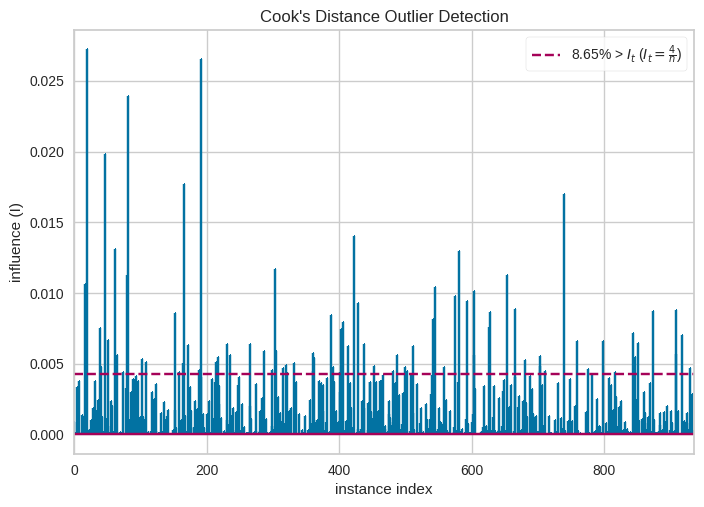

In [28]:
plot_model(lr, plot='cooks')

### 学習曲線

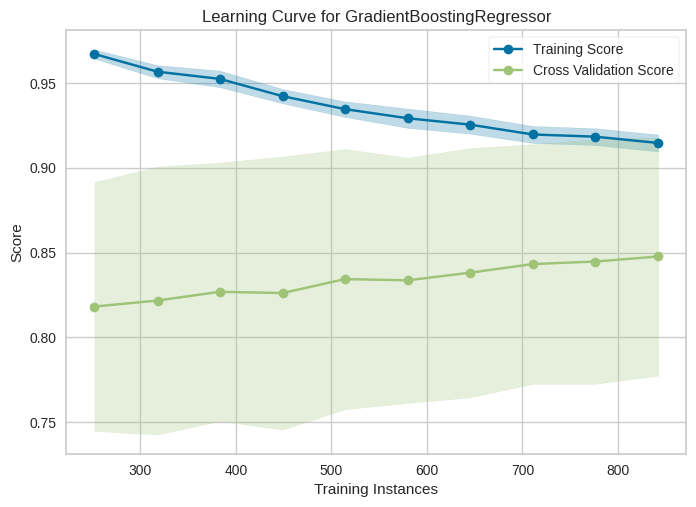

In [29]:
plot_model(best, plot='learning')

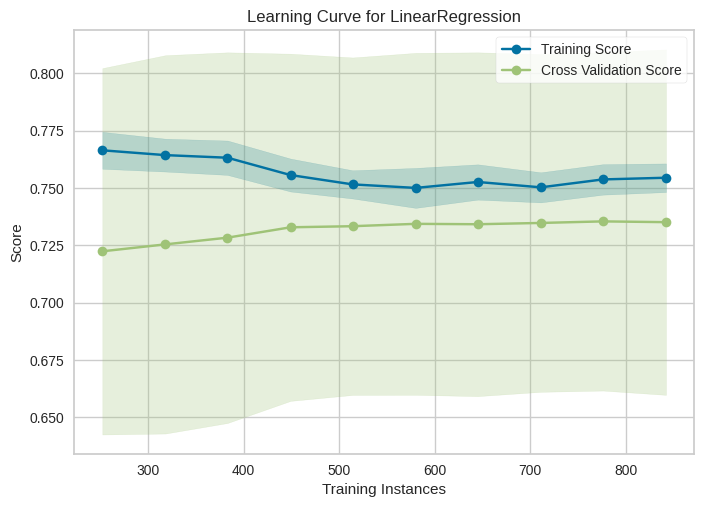

In [30]:
plot_model(lr, plot='learning')

### 特徴重要度グラフ

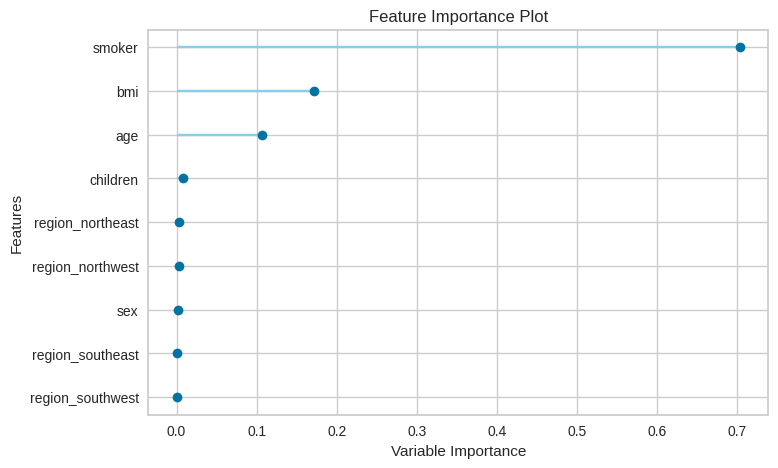

In [31]:
plot_model(best, plot='feature')

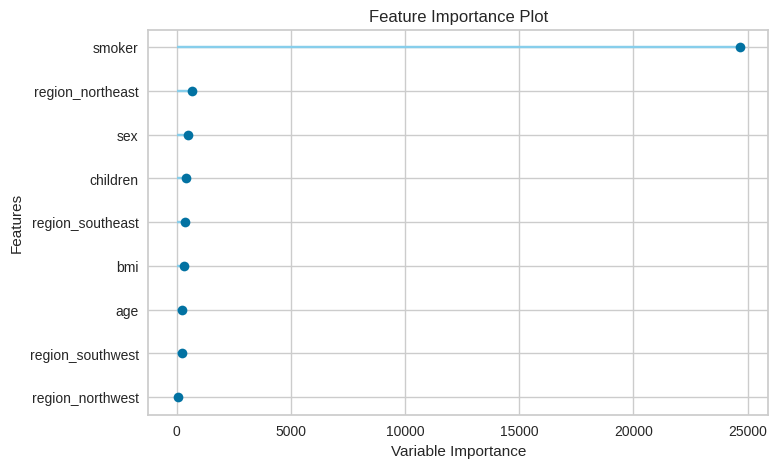

In [32]:
plot_model(lr, plot='feature')

### パイプライン

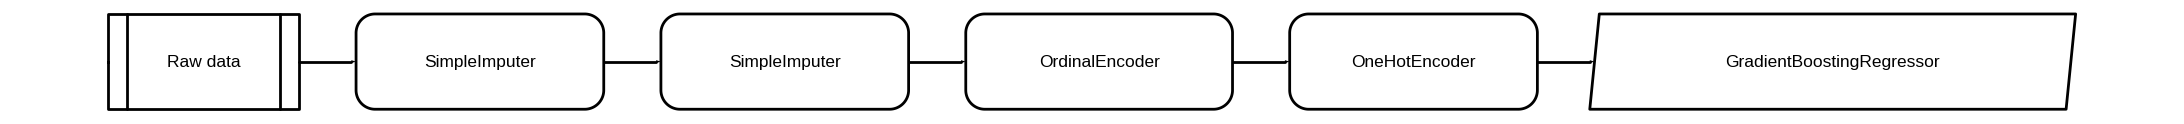

In [33]:
plot_model(best, plot='pipeline')

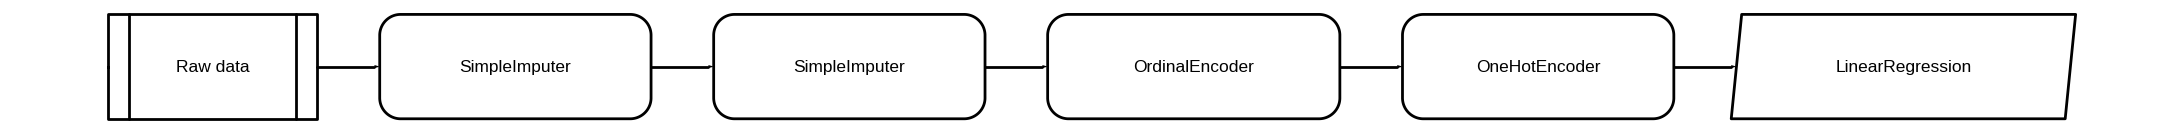

In [34]:
plot_model(lr, plot='pipeline')

### parameter

In [35]:
plot_model(best, plot='parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,squared_error
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


In [36]:
plot_model(lr, plot='parameter')

,Parameters
copy_X,True
fit_intercept,True
n_jobs,-1
positive,False


## 分類

### モデル作成

In [37]:
from pycaret.datasets import get_data
from pycaret.classification import *


data = get_data('diabetes')
clf = setup(data, target='Class variable', session_id=1234)

best = compare_models(['rf', 'knn', 'lr'])
dt = create_model('dt')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,1234
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7616,0.8273,0.5351,0.7148,0.6048,0.4413,0.4549,0.1920
rf,Random Forest Classifier,0.7597,0.8219,0.5880,0.6920,0.6273,0.4534,0.4623,0.9520
knn,K Neighbors Classifier,0.6984,0.7337,0.5085,0.5961,0.5411,0.3188,0.3267,0.1930


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6852,0.6368,0.4737,0.5625,0.5143,0.2839,0.2862
1,0.6111,0.5797,0.4737,0.4500,0.4615,0.1575,0.1576
2,0.6111,0.5797,0.4737,0.4500,0.4615,0.1575,0.1576
3,0.7593,0.7301,0.6316,0.6667,0.6486,0.4658,0.4661
4,0.7037,0.6872,0.6316,0.5714,0.6000,0.3656,0.3668
5,0.6667,0.6346,0.5263,0.5263,0.5263,0.2692,0.2692
6,0.6852,0.6368,0.4737,0.5625,0.5143,0.2839,0.2862
7,0.5849,0.5508,0.4444,0.4000,0.4211,0.0989,0.0993
8,0.7547,0.6929,0.5000,0.6923,0.5806,0.4136,0.4246


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### 混同行列

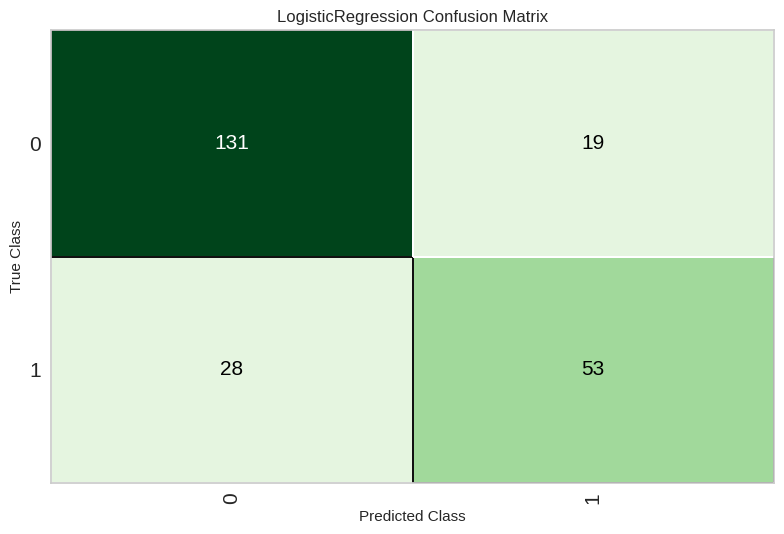

In [39]:
plot_model(best, plot='confusion_matrix')

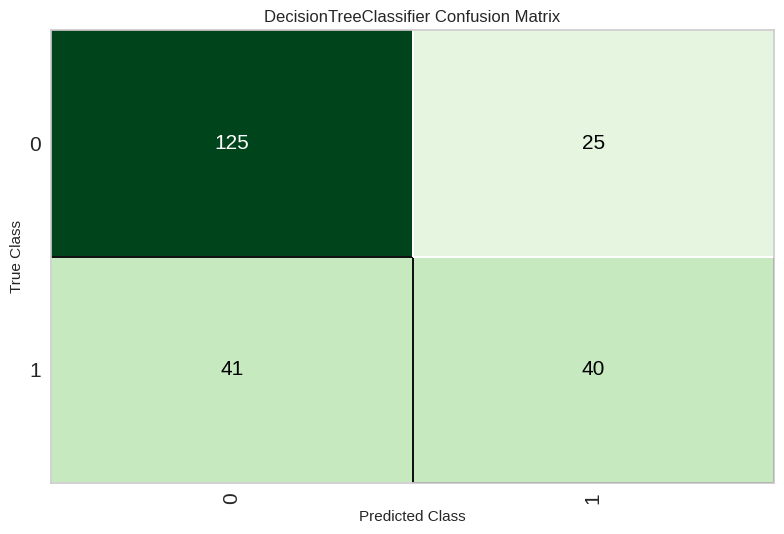

In [40]:
plot_model(dt, plot='confusion_matrix')

### AUC

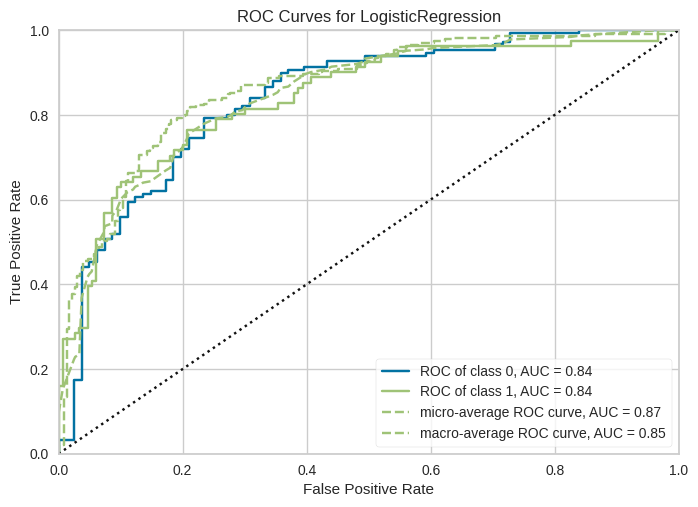

In [41]:
plot_model(best, plot='auc')

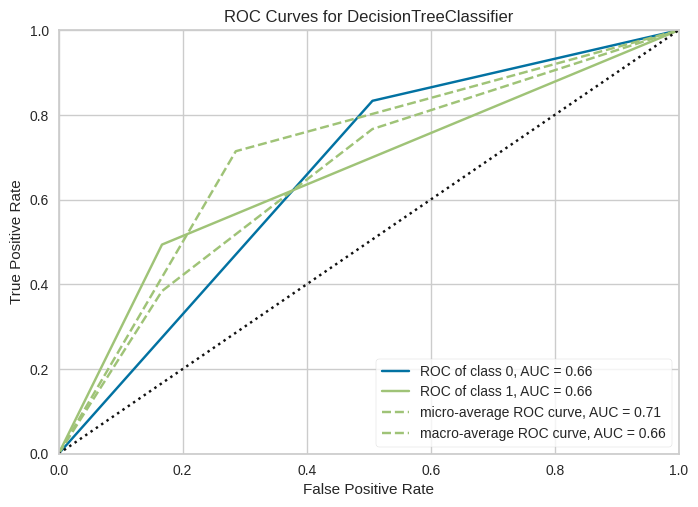

In [42]:
plot_model(dt, plot='auc')

### 閾値

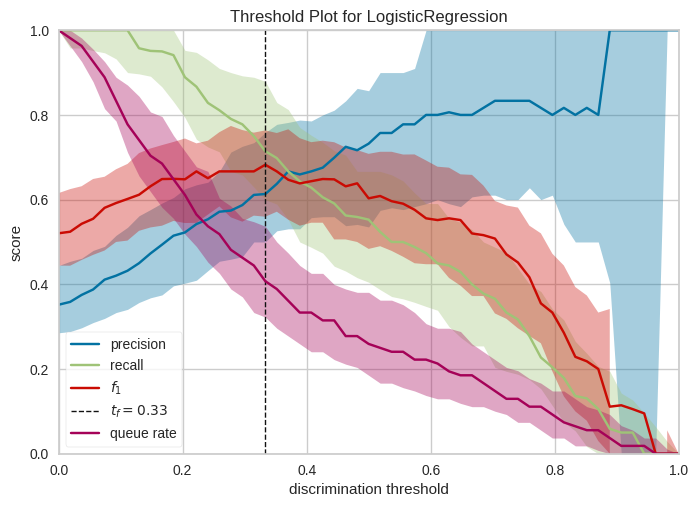

In [43]:
plot_model(best, plot='threshold')

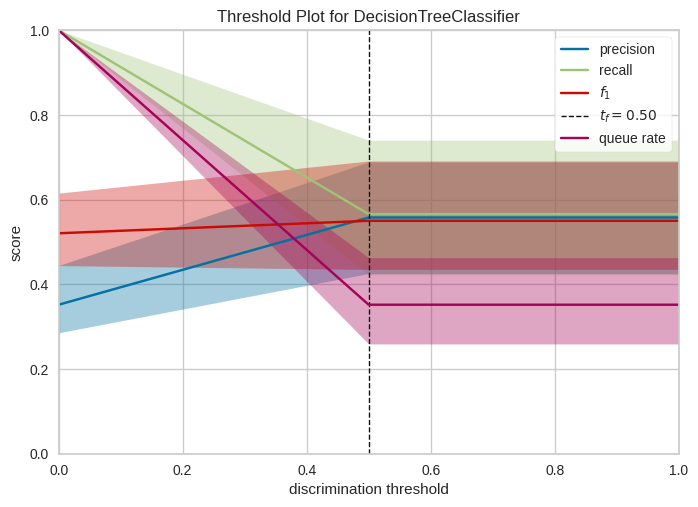

In [44]:
plot_model(dt, plot='threshold')

### パラメータ


In [45]:
plot_model(best, plot='parameter')

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [46]:
plot_model(dt, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


### Precision Recall Curve

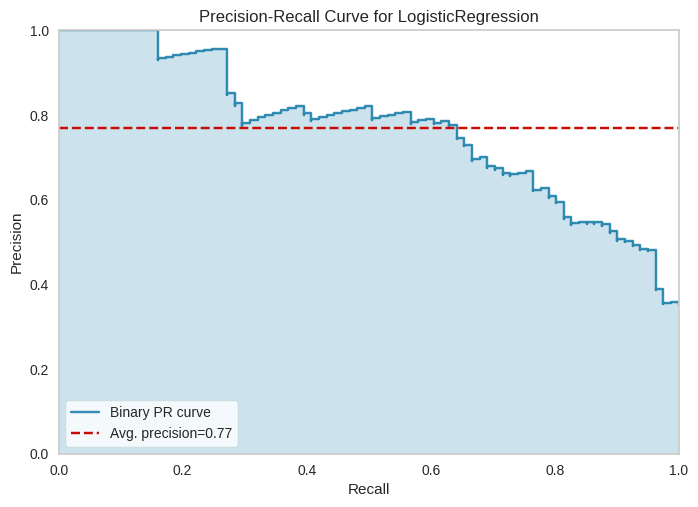

In [47]:
plot_model(best, plot='pr')

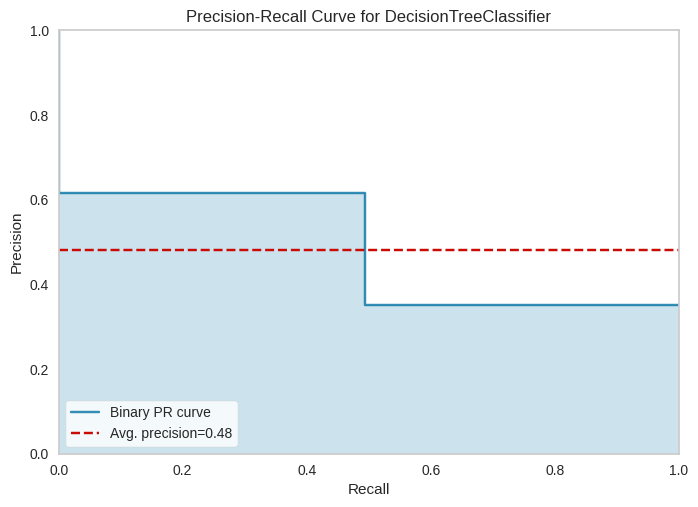

In [48]:
plot_model(dt, plot='pr')

### class_report

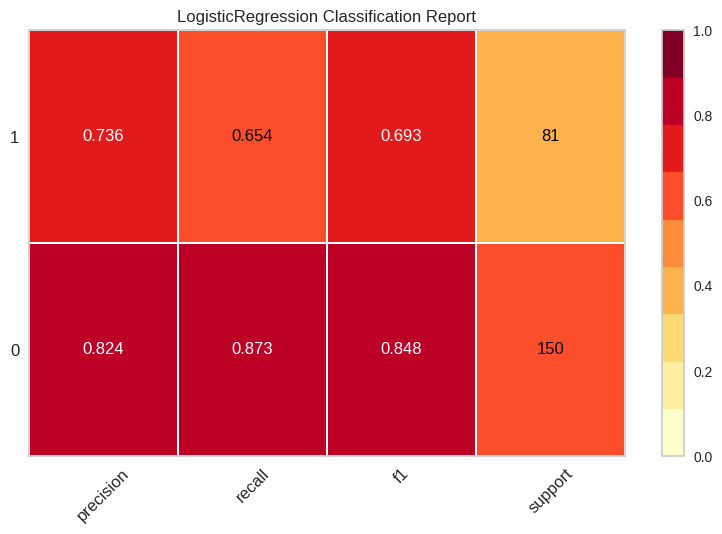

In [49]:
plot_model(best, plot='class_report')

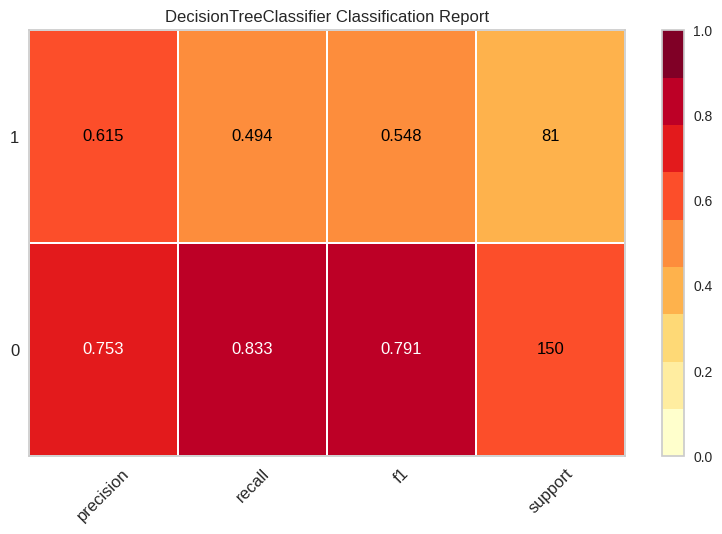

In [50]:
plot_model(dt, plot='class_report')

## クラスタリング

### モデル作成

In [51]:
from pycaret.datasets import get_data
from pycaret.clustering import *


data = get_data('iris')
s = setup(data, session_id=1234, ignore_features=['species'])

kmeans = create_model('kmeans', num_clusters=4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Description,Value
0,Session id,1234
1,Original data shape,"(150, 5)"
2,Transformed data shape,"(150, 4)"
3,Ignore features,1
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4972,529.1207,0.7760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

### PCAプロット(2次元)

In [52]:
plot_model(kmeans, plot='cluster')

### t-SNE(3次元)

In [53]:
plot_model(kmeans, plot='tsne')

In [54]:
plot_model(kmeans, plot='cluster', save=True)

't-SNE (3d) Dimension Plot.png'

# evaluate_model

In [55]:
from pycaret.datasets import get_data
from pycaret.regression import *


data = get_data('insurance')
s = setup(data, target='charges', session_id=1234)

lr = create_model('lr')
evaluate_model(lr)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,Description,Value
0,Session id,1234
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5002.2089,58832727.2740,7670.2495,0.7548,0.4542,0.3200
1,4020.2016,33874259.9324,5820.1598,0.7263,0.5171,0.3696
2,4059.1179,37969379.4259,6161.9298,0.7514,0.4967,0.3925
3,4103.8113,32285652.6018,5682.0465,0.7761,0.6382,0.4356
4,5021.6208,48694801.4984,6978.1661,0.6767,0.5986,0.4801
5,4171.3730,33794940.7097,5813.3416,0.7953,0.6225,0.4547
6,4232.5624,45056984.8218,6712.4500,0.5399,0.5916,0.4318
7,3753.0078,31527769.1556,5614.9594,0.7972,0.7180,0.3489
8,3214.6860,23658410.2539,4863.9912,0.8074,0.5167,0.4555


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
from pycaret.datasets import get_data
from pycaret.classification import *


data = get_data('diabetes')
clf = setup(data, target='Class variable', session_id=1234)

dt = create_model('dt')
evaluate_model(dt)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,1234
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6852,0.6368,0.4737,0.5625,0.5143,0.2839,0.2862
1,0.6111,0.5797,0.4737,0.4500,0.4615,0.1575,0.1576
2,0.6111,0.5797,0.4737,0.4500,0.4615,0.1575,0.1576
3,0.7593,0.7301,0.6316,0.6667,0.6486,0.4658,0.4661
4,0.7037,0.6872,0.6316,0.5714,0.6000,0.3656,0.3668
5,0.6667,0.6346,0.5263,0.5263,0.5263,0.2692,0.2692
6,0.6852,0.6368,0.4737,0.5625,0.5143,0.2839,0.2862
7,0.5849,0.5508,0.4444,0.4000,0.4211,0.0989,0.0993
8,0.7547,0.6929,0.5000,0.6923,0.5806,0.4136,0.4246


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [57]:
from pycaret.datasets import get_data
from pycaret.clustering import *


data = get_data('iris')
s = setup(data, session_id=1234, ignore_features=['species'])

kmeans = create_model('kmeans', num_clusters=4)
evaluate_model(kmeans)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Description,Value
0,Session id,1234
1,Original data shape,"(150, 5)"
2,Transformed data shape,"(150, 4)"
3,Ignore features,1
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4972,529.1207,0.7760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# get_leaderboard